In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d 

   0km  1km  2km  3km     MBL  position
0  668  452  419  447  1272.0  0.000000
1  665  450  421  441   300.0  0.000000
2  664  451  420  448   300.0  0.118592
3  667  450  416  300   300.0 -1.000000
4  666  448  418  443   300.0  0.203387
0     668
1     665
2     664
3     667
4     666
     ... 
85    687
86    685
87    685
88    684
89    682
Name: 0km, Length: 90, dtype: int64


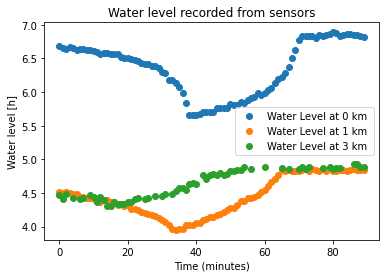

In [3]:
import pandas as pd
data = pd.read_csv("data.csv") 
print(data.head())


zeroKm = data.loc[:,"0km"] 
print(zeroKm)
plt.plot(zeroKm/100., 'o',label='Water Level at 0 km ')



"""
twoKm = data.loc[:,'2km']
plt.plot(twoKm/100., 'o',label='Water Level at 2 km ')
"""


oneKm = data.loc[:,"1km"]
plt.plot(oneKm/100., 'o',label='Water Level at 1 km ')



threeKm = data.loc[:,"3km"]
#removing anomalies from data 3km
threeKm = threeKm.loc[threeKm != 300]
plt.plot(threeKm/100., 'o',label='Water Level at 3 km ')
plt.title("Water level recorded from sensors")




plt.xlabel ( 'Time (minutes)' )
plt.ylabel ( 'Water level [h]' )
plt.legend()

### Data.csv:
This file contains the data collected at 4 equidistant points along the Bedian canal, with the values in the columns representing the water level at that point, and each row representing a minute in time at which the data was collected. So, each column is a point in the canal and each row is the water level in the canal at those points at a given minute in time, collected over 90 minutes.

### Bedian.py:

#### First graph:
In this file, the first graph titled "Water level recorded from sensors" used the plt.plot function to plot each of the points in the above data file. The data points are colored according to the column they belong to, and the graph thus made gives us an approximate understanding of the water level at each of the equidistant columns.


[ 3.16868207e-09 -5.95317309e-07  3.11436335e-05 -1.02964523e-04
 -1.14521057e-02  4.47965734e+00]


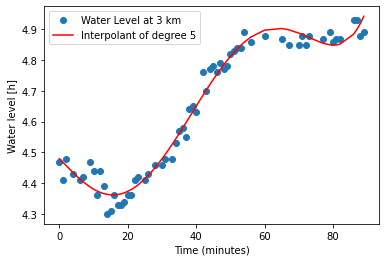

In [5]:
t3 = threeKm.index

poly3 = np.polyfit(t3, threeKm / 100., deg = 5)
polyVal3 = np.polyval(poly3, t3)

print(poly3)
plt.clf()
plt.plot(threeKm/100., 'o',label='Water Level at 3 km ')
plt.plot(t3, polyVal3, color = 'red', label='Interpolant of degree 5')
plt.xlabel ( 'Time (minutes)' )
plt.ylabel ( 'Water level [h]' )
plt.legend()
plt.savefig("data_3km.png")
plt.show()

#### Second graph:
For each of the 4 columns in the canal, the water level was measured at 64 different minutes spread over one and a half hour.To be able to interpolate the water level at a given column at a different time or day, we try to find a curve which can represent the underlying trends in our data. Curves on graphs are represented by polynomial equations. Had we chosen a polynomial of degree 64 (degree being the highest power in the polynomial) to represent this data, our curve would pass through each of the collected points. But for interpolation to make sense, we fit our data to a polynomial of degree 5, so that when we try to get an estimate at another time on another day, it wouldn't be too far off from our generalized curve. Which of course, is generalized since we didn't overfit it pass through all 64 points.